# Analyzing Patient Data

[SWC Lesson](http://swcarpentry.github.io/python-novice-inflammation/01-numpy.html)

shift+Enter to execute a cell

\+ at top of page creates a new cell

First button (picture of a floppy disk) saves your notebook

Other options: we'll see tomorrow

### Premise:

Inflamation Data: level of inflamation of patients over different days

## Getting Started

Library = Toolbox - we need to get our tools

In [2]:
import numpy

NumPy library: arrays and matrices.

Introduce dot notation: access tools by first naming the toolbox, then the tool

#### Read file

In [3]:
numpy.loadtxt(fname = 'data/inflammation-01.csv', delimiter = ',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

Explain loadtxt:
* Function
* input parameters

Output:
* doesn't display everything
* will show decimals as needed

Other options to read in files

#### Save output to variable: Example weight

In [5]:
#Assign
weight_kg = 55

- View
- In place arithmatic
- New Assignment

In [1]:
weight_kg = 57.5
weight_lbs = 2.2*weight_kg
print('weight in kilograms is now:', weight_kg, 'weight in pounds', weight_lbs)

weight in kilograms is now: 57.5 weight in pounds 126.50000000000001


Reassignment

In [4]:
weight_kg = 100
print('weight in kilograms is now:', weight_kg, 'weight in pounds', weight_lbs)

weight in kilograms is now: 100 weight in pounds 126.50000000000001


Doesn't change weight_lbs

#### Post-it example
For immuntable objects - weight_kg points to 57.5, weight_lbs points to 57.5. When you reassign weight_kg, it now points somewhere else, but weight_lbs still points to 57.5

### Now apply to inflammation data

In [8]:
data = numpy.loadtxt(fname = 'data/inflammation-01.csv', delimiter = ',')
print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


Now we can pass data to other functions 

In [9]:
print(type(data))

<class 'numpy.ndarray'>


and ask it things about itself

In [10]:
print(data.shape)

(60, 40)


type = Function (built in)

shape = attribute (of data)

shape tells us the number of rows (60) and columns (40) (60 patients, 40 measurements)

### Accessing a single number (indexing)

In [11]:
print('first value in data: ', data[0,0])

first value in data:  0.0


In [12]:
print('middle value in data: ', data[30, 20])

middle value in data:  13.0


Notes:
* square brackets (python cares about bracket shapes)
* rows, columns
* zero index
* start in upper left corner

#### Slicing

In [13]:
print(data[5:10, 0:10])

[[ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


include first number, don't include second number

Implied beginning and ending

In [14]:
small = data[:3, 36:]
print('small is: ')
print(small)

small is: 
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]


### Defining Operations on Arrays

#### Multiplication

In [15]:
doubledata = data*2.0

In [17]:
print('original')
print(data[:3, 36:])
print('doubledata')
print(doubledata[:3,36:])

original
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]
doubledata
[[ 4.  6.  0.  0.]
 [ 2.  2.  0.  2.]
 [ 4.  4.  2.  2.]]


Not matrix multiplication. Does everything element wise.

#### Addition

In [18]:
tripledata = doubledata + data

In [19]:
print('tripledata')
print(tripledata[:3, 36:])

tripledata
[[ 6.  9.  0.  0.]
 [ 3.  3.  0.  3.]
 [ 6.  6.  3.  3.]]


### Methods 

variables know how to calculate things about themselves

In [20]:
print(data.mean())

6.14875


Different from an attribute b/c ()

Other useful methods:

In [21]:
print('maximum inflammation: ', data.max())
print('minimum inflammation: ', data.min())
print('Standard deviation: ', data.std())

maximum inflammation:  20.0
minimum inflammation:  0.0
Standard deviation:  4.61383319712


###Accessing all possible attributes and methods

data.   -tab-

## Combining Slicing and Methods: Information on a single patient

In [22]:
patient_0 = data[0, :] # 0 on the first axis, everything on the second
print('maximum inflammation for patient 0:', patient_0.max())

maximum inflammation for patient 0: 18.0


#### or max for each patient

In [23]:
print(data.max(axis=1))

[ 18.  18.  19.  17.  17.  18.  17.  20.  17.  18.  18.  18.  17.  16.  17.
  18.  19.  19.  17.  19.  19.  16.  17.  15.  17.  17.  18.  17.  20.  17.
  16.  19.  15.  15.  19.  17.  16.  17.  19.  16.  18.  19.  16.  19.  18.
  16.  19.  15.  16.  18.  14.  20.  17.  15.  17.  16.  17.  19.  18.  18.]


###Axes
Numpy arrays are index [rows, columns], so axis = 0 means perform operation over the rows (e.g. find the mean of a column by looking at the value in each row) and axis = 1 means perform operation over the columns (e.g. find the max of a row by looking at the value in each column

<img src='python-operations-across-axes.png' style="width:600px;height:400px;"></img>

In [24]:
print(data.max(axis = 1).shape)
print(data.mean(axis = 0).shape)

(60,)
(40,)


## Plotting

In [28]:
#modifable plots in the notebook
%matplotlib notebook 
#or
%matplotlib

Using matplotlib backend: nbAgg


In [29]:
#Ipython magic
%matplotlib inline  

In [30]:
#Plotting library
import matplotlib   

### Create a heat map

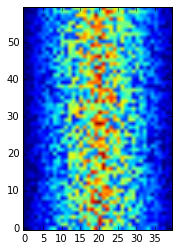

In [31]:
image = matplotlib.pyplot.imshow(data)

#### Create a plot of average inflammation over time

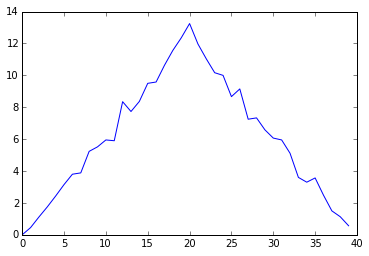

In [32]:
ave_inflammation = data.mean(axis = 0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)

### Create an advanced Figure

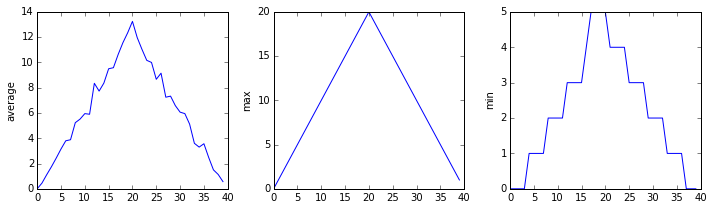

In [33]:
fig = matplotlib.pyplot.figure(figsize = (10.0, 3.0))

mean_axes = fig.add_subplot(1, 3, 1)
max_axes = fig.add_subplot(1, 3, 2)
min_axes = fig.add_subplot(1, 3, 3)

mean_axes.set_ylabel('average')
mean_axes.plot(data.mean(axis = 0))

max_axes.set_ylabel('max')
max_axes.plot(data.max(axis = 0))

min_axes.set_ylabel('min')
min_axes.plot(data.min(axis = 0))

fig.tight_layout()

Final thoughts:
* We're not giving two arrays...
* Aliasing so you don't have to type (e.g. import numpy as np)
* From matplotlib import pyplot

# Exercise 1:

A section of an array is called a slice. We can take slices of character strings as well:

In [34]:
element = 'oxygen'
print('first three characters:', element[0:3])
print('last three characters:', element[3:6])

first three characters: oxy
last three characters: gen


What is the value of element[:4]? What about element[4:]? Or element[:]?

What is element[-1]? What is element[-2]? Given those answers, explain what element[1:-1] does.



### Solution

In [35]:
print(element[:4])
print(element[4:])
print(element[:])
print(element[-1])
print(element[-2])
print(element[1:-1])

oxyg
en
oxygen
n
e
xyge


# Exercise 2:

Create a plot showing the standard deviation (numpy.std) of the inflammation data for each day across all patients.

### Solution

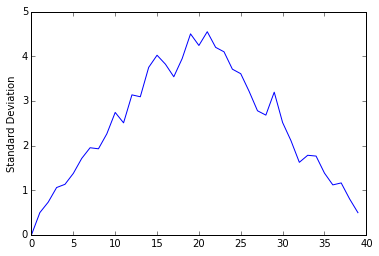

In [36]:
fig = matplotlib.pyplot.figure()
std_axes = fig.add_subplot(1,1,1)
std_axes.set_ylabel('Standard Deviation')
std_axes.plot(data.std(axis = 0))

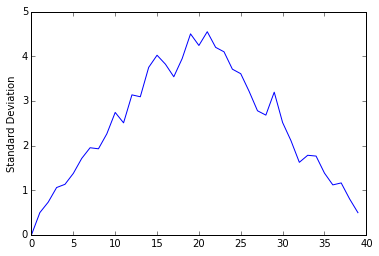

In [37]:
matplotlib.pyplot.ylabel('Standard Deviation')
matplotlib.pyplot.plot(data.std(axis = 0))

------------------------

# Repeating Actions with Loops

[SWC Lesson](http://swcarpentry.github.io/python-novice-inflammation/02-loop.html)

In [38]:
ls data/*.csv

data/inflammation-01.csv  data/inflammation-06.csv  data/inflammation-11.csv
data/inflammation-02.csv  data/inflammation-07.csv  data/inflammation-12.csv
data/inflammation-03.csv  data/inflammation-08.csv  data/small-01.csv
data/inflammation-04.csv  data/inflammation-09.csv  data/small-02.csv
data/inflammation-05.csv  data/inflammation-10.csv  data/small-03.csv


There are a lot of files - what if we want to look at plots for all of them?

In [54]:
word = 'lead'
print word[0]
print word[1]
print word[2]
print word[3]

l
e
a
d


Bad:
* (scale) don't want to do this for a word with 100 characters
* (fragile) only works for a word that is 4 characters

In [44]:
word = 'tin'
print(word[0])
print(word[1])
print(word[2])
print(word[3])

t
i
n


IndexError: string index out of range

Short discussion of tracebacks

Introduce Loop:

for variable in collection:

    do things with variable

In [40]:
word = 'lead'
for char in word:
    print(char)

l
e
a
d


### Length function

In [42]:
print(len('lead'))

4


# Exercise 3

Exponentiation is built into Python

In [43]:
print(5**3)

125


Write a loop that calculates the same result as 5**3 using multiplication (without exponentiation)

In [48]:
###Solution
original_num = 1.0
for time in [0, 1, 2]:
    original_num = original_num *  5
print(original_num)

125.0


Shortcuts:
- range(3)
- original_num *= 5

----------------------------

# Storing Multiple Values in Lists

[SWC Lesson](http://swcarpentry.github.io/python-novice-inflammation/03-lists.html)

List: 
* built in way to store multiple values
* square brackets

In [49]:
odds = [1, 3, 5, 7]
print('odds are:', odds)

odds are: [1, 3, 5, 7]


#### Indexing

In [50]:
print('first and last:', odds[0], odds[-1])

first and last: 1 7


#### Looping

In [51]:
for number in odds:
    print(number)

1
3
5
7


### Mutable and Immutable

Immuntable objects: variable points to the item itself which does not contain other items (e.g. can't index into a string, can't index into a number). A good rule of thumb is if you can index into it to get values, it is mutable (exception tuples)

But lists can be changed item by item - they are mutable

In [53]:
names = ['Newton', 'Darwing', 'Turing']
print('names is originally: ', names)
names[1] = 'Darwin'
print('final value of names:', names)

names is originally:  ['Newton', 'Darwing', 'Turing']
final value of names: ['Newton', 'Darwin', 'Turing']


Recall earlier we saw immutable objects:

In [54]:
weight_kg = 100
weight_lbs = 2.2*weight_kg
print(weight_kg, weight_lbs)

weight_kg = 200
print(weight_kg, weight_lbs)

100 220.00000000000003
200 220.00000000000003


changing weight_kg did not affect weight_lbs

However, changing items in a mutable object changes that item for all variable that point to that object

In [56]:
print('original names = ', names)
new_names = names
names[1] = 'Bell'
print('names = ', names)
print('new names = ', new_names)

original names =  ['Newton', 'Darwin', 'Turing']
names =  ['Newton', 'Bell', 'Turing']
new names =  ['Newton', 'Bell', 'Turing']


## Ways to modify a list

In [57]:
odds.append(11)
print('odds after adding a value: ', odds)

odds after adding a value:  [1, 3, 5, 7, 11]


In [58]:
del odds[0]
print('odds after removing the first element', odds)

odds after removing the first element [3, 5, 7, 11]


In [59]:
odds.reverse()
print('odds after reversing: ', odds)

odds after reversing:  [11, 7, 5, 3]


Note this is an inplace operation

# Exercise 4

Use a for-loop to convert the string “hello” into a list of letters: ['h', 'e', 'l', 'l', 'o']

Hint: you can create an empty list like this:

In [82]:
my_list = []

### Solution:

In [61]:
my_list = []
for letter in 'hello':
    my_list.append(letter)

In [62]:
print(my_list)

['h', 'e', 'l', 'l', 'o']


-----------------------------

# Analyzing Data from Multiple Files

[SWC Lesson](http://swcarpentry.github.io/python-novice-inflammation/04-files.html)

Recall - the plot we made before looked funny - the max values were smoothly increasing then decreasing and the min values looked like a step function. Now we can make plots of each file to see if each files does this.

In [63]:
import glob

glob is kind of like <code>ls</code> in the shell in that it returns a list of filenames that match some pattern you give it

In [65]:
print(glob.glob('data/*.csv'))

['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-05.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-08.csv', 'data/inflammation-09.csv', 'data/inflammation-10.csv', 'data/inflammation-11.csv', 'data/inflammation-12.csv', 'data/small-01.csv', 'data/small-02.csv', 'data/small-03.csv']


# Exercise 5:

Copy and paste the advanced plotting code (from Create an advanced Figure) and use glob and a for loop to make plots of mean, max, and min values for the first 3 files.

###Solution

data/inflammation-01.csv


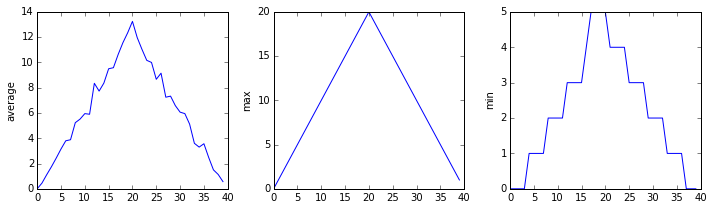

data/inflammation-02.csv


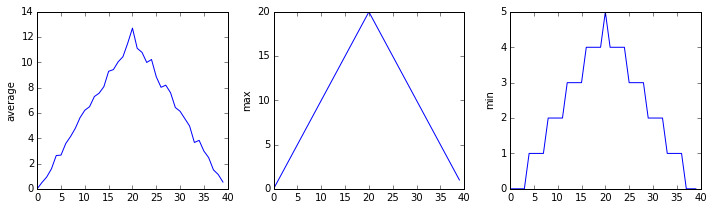

data/inflammation-03.csv


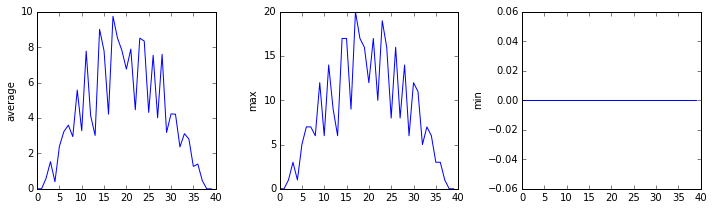

In [66]:
filenames = glob.glob('data/*.csv')
filenames = filenames[0:3]
for f in filenames:
    print(f)
    data = numpy.loadtxt(fname = f, delimiter = ',')
    #Indent everything by highlighting and then pressing tab
    fig = matplotlib.pyplot.figure(figsize = (10.0, 3.0))

    mean_axes = fig.add_subplot(1, 3, 1)
    max_axes = fig.add_subplot(1, 3, 2)
    min_axes = fig.add_subplot(1, 3, 3)

    mean_axes.set_ylabel('average')
    mean_axes.plot(data.mean(axis = 0))

    max_axes.set_ylabel('max')
    max_axes.plot(data.max(axis = 0))

    min_axes.set_ylabel('min')
    min_axes.plot(data.min(axis = 0))

    fig.tight_layout()
    matplotlib.pyplot.show()

Files 1 and 2 look suspicious, file 3 looks more like we expect

--------------------------

# Making Choices

[SWC Lesson](http://swcarpentry.github.io/python-novice-inflammation/05-cond.html)

How can we automatically detect that something is funny with the first 2 datasets and take action accordingly?

## Conditionals

In [70]:
#if + elif + else
num = 100
print('num is ', num)
if num > 100:
    print('greater')
elif num == 100:
    print('equals 100')
else:
    print('not greater')
print('done')

num is  100
equals 100
done


Note the double equals sign

#### Combine tests with and and or

In [72]:
print(1 > 0)

True


This is a boolean - it is just True or False. True can also be represented with a 1 and False can be represented with a 0

In [73]:
if (1 > 0) and (-1 > 0):
    print('both parts are true')
else:
    print('at least one part is false')

at least one part is false


In [74]:
if (1 > 0) or (-1 > 0):
    print('at least one part is true')
else:
    print('both parts are false')

at least one part is true


## Checking our Data

Check for step function max: 

If first value is 0 and middle value is 20, this might be a step function max

In [75]:
data = numpy.loadtxt('data/inflammation-01.csv', delimiter = ',')
if data.max(axis = 0)[0] == 0 and data.max(axis = 0)[20] == 20:
    print('Suspicious looking maxima!')

Suspicious looking maxima!


Check for a healthy person in study

In [76]:
data = numpy.loadtxt('data/inflammation-03.csv', delimiter = ',')
if data.min(axis=0).sum() != 0:
    print('No healthy person in sample (min do not sum to 0)')

Minima add up to zero!


Combine statements:

In [79]:
if data.max(axis = 0)[0] == 0 and data.max(axis = 0)[20] == 20:
    print('Suspicious looking maxima!')
elif data.min(axis=0).sum() != 0:  #Modify to elif
    print('No healthy person in sample (min do not sum to 0)')
else: #Add else
    print('Seems OK!')

Seems OK!


#Exercise 6
Test 3 inflammation files using a loop, the glob function, and what we've just done

###Solution

In [80]:
filenames = glob.glob('data/*.csv')
filenames = filenames[0:3]
for f in filenames:
    print(f)
    data = numpy.loadtxt(fname = f, delimiter = ',')
    if data.max(axis = 0)[0] == 0 and data.max(axis = 0)[20] == 20:
        print('    Suspicious looking maxima!')
    elif data.min(axis=0).sum() != 0:  #Modify to elif
        print('No healthy person in sample (min do not sum to 0)')
    else: #Add else
        print('    Seems OK!')

data/inflammation-01.csv
    Suspicious looking maxima!
data/inflammation-02.csv
    Suspicious looking maxima!
data/inflammation-03.csv
    Seems OK!


This matches what we saw in the plots

Note: This only catches the first error. How could you catch all errors?
- two if statements
- or statement

# Exercise 7:

True and False are special words in Python called booleans which represent true and false statements. However, they aren’t the only values in Python that are true and false. In fact, any value can be used in an if or elif. After reading and running the code below, explain what the rule is for which values are considered true and which are considered false. (Note that if the body of a conditional is a single statement, we can write it on the same line as the if.)

### Solution:

In [81]:
if '': print('empty string is true')
if 'word': print('word is true')
if []: print('empty list is true')
if [1, 2, 3]: print('non-empty list is true')
if 0: print('zero is true')
if 1: print('one is true')

word is true
non-empty list is true
one is true


-------------------------------

# Creating Functions

[SWC Lesson](http://swcarpentry.github.io/python-novice-inflammation/06-func.html)

* Reusable code
* Don't repeat multiple lines
* easier to fix mistakes
* more compact code (and more clear)
* paragraphs of code

In [83]:
def fahr_to_kelvin(temp):
    temp_kelvin = ((temp - 32) * (5/9))+ 273.15
    return temp_kelvin

Key Features:
* def name of function
* pass in temp
* body does something
* body is intented - function ends when indentation ends
* return = output

Let's test our function with some values we know:

In [84]:
print('freezing point of water: ', fahr_to_kelvin(32))
print('boiling point of water: ', fahr_to_kelvin(212))

freezing point of water:  273.15
boiling point of water:  373.15


A note on integer division:
Python 3 defaults to floating point division
Python 2 defaults to whatever you used. If you used integers - its integer division, if you used floats its floating point division.

Integer division in Python 3 (and 2 if you want to be explicit) 5//9

In [86]:
print(5/9)
print(5//9) #truncates doesn't round

0.5555555555555556
0


## Composing Functions

In [88]:
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

print('absolute zero in Celsius: ', kelvin_to_celsius(0.0))

absolute zero in Celsius:  -273.15


How would you write a function to convert Fahrenheit to Celsius?

In [89]:
def fahr_to_celsius(temp_f):
    temp_k = fahr_to_kelvin(temp_f)
    temp_c = kelvin_to_celsius(temp_k)
    return temp_c

In [91]:
print('freezing point of water in celsius: ', fahr_to_celsius(32))

freezing point of water in celsius:  0.0


You can see how you can start to build larger pieces of code out of small functions

- small managable functions
- easy to test (check that they are working correctly)
- easy to read

## Applying functions to Inflammation Data

Create and analyze function to take a filename and output a plot

1. Write a skeleton of what you want to do

In [92]:
def plot_data(filename):
    '''
    reuse plotting code
    '''
    pass

def detect_problems(filename):
    '''
    figure out if data in file is good
    '''
    pass

From before:

data/inflammation-01.csv


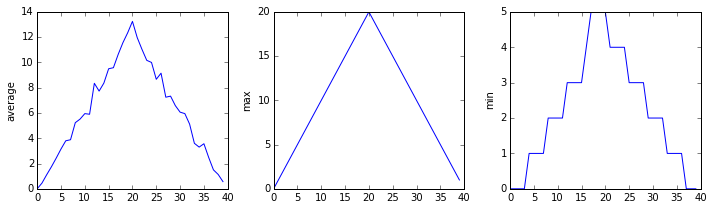

data/inflammation-02.csv


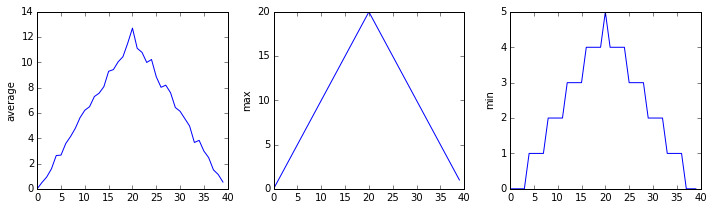

data/inflammation-03.csv


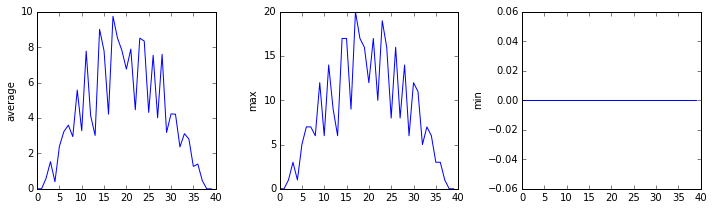

In [94]:
filenames = glob.glob('data/*.csv')
filenames = filenames[0:3]
for f in filenames:
    print(f)
    data = numpy.loadtxt(fname = f, delimiter = ',')
    #Indent everything by highlighting and then pressing tab
    fig = matplotlib.pyplot.figure(figsize = (10.0, 3.0))

    mean_axes = fig.add_subplot(1, 3, 1)
    max_axes = fig.add_subplot(1, 3, 2)
    min_axes = fig.add_subplot(1, 3, 3)

    mean_axes.set_ylabel('average')
    mean_axes.plot(data.mean(axis = 0))

    max_axes.set_ylabel('max')
    max_axes.plot(data.max(axis = 0))

    min_axes.set_ylabel('min')
    min_axes.plot(data.min(axis = 0))

    fig.tight_layout()
    matplotlib.pyplot.show()

In [95]:
def plot_data(filename):
    '''
    reuse plotting code
    '''
    data = numpy.loadtxt(fname = f, delimiter = ',')
    #Indent everything by highlighting and then pressing tab
    fig = matplotlib.pyplot.figure(figsize = (10.0, 3.0))

    mean_axes = fig.add_subplot(1, 3, 1)
    max_axes = fig.add_subplot(1, 3, 2)
    min_axes = fig.add_subplot(1, 3, 3)

    mean_axes.set_ylabel('average')
    mean_axes.plot(data.mean(axis = 0))

    max_axes.set_ylabel('max')
    max_axes.plot(data.max(axis = 0))

    min_axes.set_ylabel('min')
    min_axes.plot(data.min(axis = 0))

    fig.tight_layout()
    matplotlib.pyplot.show()

From before:

In [96]:
filenames = glob.glob('data/*.csv')
filenames = filenames[0:3]
for f in filenames:
    data = numpy.loadtxt(fname = f, delimiter = ',')
    if data.max(axis = 0)[0] == 0 and data.max(axis = 0)[20] == 20:
        print('    Suspicious looking maxima!')
    elif data.min(axis=0).sum() != 0:  #Modify to elif
        print('No healthy person in sample (min do not sum to 0)')
    else: #Add else
        print('    Seems OK!')

    Suspicious looking maxima!
    Suspicious looking maxima!
    Seems OK!


In [97]:
def detect_problems(filename):
    '''
    figure out if data in file is good
    '''
    data = numpy.loadtxt(fname = f, delimiter = ',')
    if data.max(axis = 0)[0] == 0 and data.max(axis = 0)[20] == 20:
        print('    Suspicious looking maxima!')
    elif data.min(axis=0).sum() != 0:  #Modify to elif
        print('No healthy person in sample (min do not sum to 0)')
    else: #Add else
        print('    Seems OK!')

Or we could have it return the end message

In [98]:
def detect_problems(filename):
    '''
    figure out if data in file is good
    '''
    data = numpy.loadtxt(fname = f, delimiter = ',')
    if data.max(axis = 0)[0] == 0 and data.max(axis = 0)[20] == 20:
        return '    Suspicious looking maxima!'
    elif data.min(axis=0).sum() != 0:  #Modify to elif
        return '    Minima add up to zero!'
    else: #Add else
        return '    Seems OK!'

Easy to follow code:

data/inflammation-01.csv


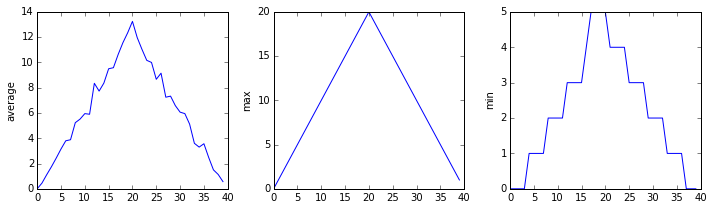

    Suspicious looking maxima!
data/inflammation-02.csv


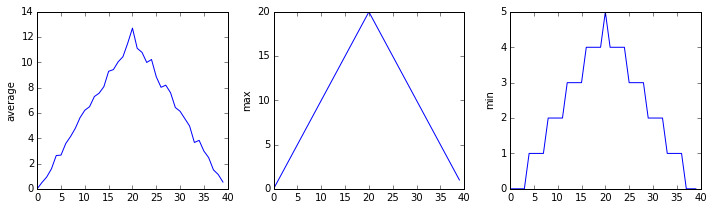

    Suspicious looking maxima!
data/inflammation-03.csv


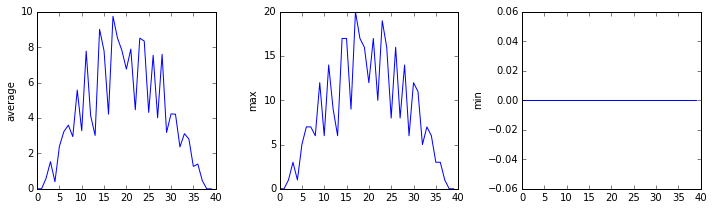

    Seems OK!


In [99]:
for f in filenames[:3]:
    print(f)
    plot_data(f)
    dataset_status = detect_problems(f)
    print(dataset_status)

# Testing

Function to center a dataset around a desired value

In [100]:
def center(data, desired):
    '''
    Return a new array containing the original data centered around the desired value.
    '''
    return (data - data.mean()) + desired

Test on fake data: create an array of zeros and center on 3

In [101]:
z = numpy.zeros((2,2))
print(z)
print(center(z, 3))

[[ 0.  0.]
 [ 0.  0.]]
[[ 3.  3.]
 [ 3.  3.]]


Try on real data with simple centering

In [102]:
center(data, 0)

array([[-4.20458333, -4.20458333, -4.20458333, ..., -4.20458333,
        -4.20458333, -4.20458333],
       [-4.20458333, -4.20458333, -4.20458333, ..., -3.20458333,
        -4.20458333, -4.20458333],
       [-4.20458333, -4.20458333, -3.20458333, ..., -4.20458333,
        -4.20458333, -4.20458333],
       ..., 
       [-4.20458333, -4.20458333, -3.20458333, ..., -3.20458333,
        -4.20458333, -4.20458333],
       [-4.20458333, -4.20458333, -3.20458333, ..., -3.20458333,
        -4.20458333, -4.20458333],
       [-4.20458333, -4.20458333, -4.20458333, ..., -4.20458333,
        -4.20458333, -4.20458333]])

Its hard to tell if this worked, but we can compare statistics to the original data. What do we expect?
* centered mean should be 0
* centered max and min should be offset by the same amount
* std doesn't change

In [103]:
print('original')
print('   min', data.min())
print('   mean', data.mean())
print('   max', data.max())
print('   std', data.std())
centered = center(data, 0)
print('centered')
print('   min', centered.min())
print('   mean', centered.mean())
print('   max', centered.max())
print('   std', centered.std())

original
   min 0.0
   mean 4.20458333333
   max 20.0
   std 4.4076897569
centered
   min -4.20458333333
   mean 6.33567272719e-16
   max 15.7954166667
   std 4.4076897569


Did we get what we expected? Can we put it in an easier format to understand?

In [104]:
print('difference in standard deviations before and after:', data.std() - centered.std())

difference in standard deviations before and after: 0.0


In [106]:
assert data.std() - centered.std() == 0.0, 'Standard deviation changed'

## Getting help

In [107]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.



Even better if you can tell your user about what to input, output, and give an example

In [108]:
def center(data, desired):
    '''
    Return a new array containing the original data centered around the desired value.
    Input:
        data: an array of data to be centered
        desired: a single number to center the data on
    Output:
        centered dataset of the same size as input data
        
    Example:
        center([1, 2, 3], 0) ==> [-1, 0, 1]

    '''
    return (data - data.mean()) + desired

In [109]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Input:
        data: an array of data to be centered
        desired: a single number to center the data on
    Output:
        centered dataset of the same size as input data
        
    Example:
        center([1, 2, 3], 0) ==> [-1, 0, 1]



# Defining defaults

In [110]:
def center(data, desired = 0.0):
    '''
    Return a new array containing the original data centered around the desired value.
    Input:
        data: an array of data to be centered
        desired: a single number to center the data on
    Output:
        centered dataset of the same size as input data
        
    Example:
        center([1, 2, 3], 0) ==> [-1, 0, 1]

    '''
    return (data - data.mean()) + desired

Now we can call our function with the default offset:

In [111]:
center(data)

array([[-4.20458333, -4.20458333, -4.20458333, ..., -4.20458333,
        -4.20458333, -4.20458333],
       [-4.20458333, -4.20458333, -4.20458333, ..., -3.20458333,
        -4.20458333, -4.20458333],
       [-4.20458333, -4.20458333, -3.20458333, ..., -4.20458333,
        -4.20458333, -4.20458333],
       ..., 
       [-4.20458333, -4.20458333, -3.20458333, ..., -3.20458333,
        -4.20458333, -4.20458333],
       [-4.20458333, -4.20458333, -3.20458333, ..., -3.20458333,
        -4.20458333, -4.20458333],
       [-4.20458333, -4.20458333, -4.20458333, ..., -4.20458333,
        -4.20458333, -4.20458333]])

Or with a different offset

In [112]:
center(data, desired = 1.0)

array([[-3.20458333, -3.20458333, -3.20458333, ..., -3.20458333,
        -3.20458333, -3.20458333],
       [-3.20458333, -3.20458333, -3.20458333, ..., -2.20458333,
        -3.20458333, -3.20458333],
       [-3.20458333, -3.20458333, -2.20458333, ..., -3.20458333,
        -3.20458333, -3.20458333],
       ..., 
       [-3.20458333, -3.20458333, -2.20458333, ..., -2.20458333,
        -3.20458333, -3.20458333],
       [-3.20458333, -3.20458333, -2.20458333, ..., -2.20458333,
        -3.20458333, -3.20458333],
       [-3.20458333, -3.20458333, -3.20458333, ..., -3.20458333,
        -3.20458333, -3.20458333]])

Or we can use our previous call

In [113]:
center(data, 1.0)

array([[-3.20458333, -3.20458333, -3.20458333, ..., -3.20458333,
        -3.20458333, -3.20458333],
       [-3.20458333, -3.20458333, -3.20458333, ..., -2.20458333,
        -3.20458333, -3.20458333],
       [-3.20458333, -3.20458333, -2.20458333, ..., -3.20458333,
        -3.20458333, -3.20458333],
       ..., 
       [-3.20458333, -3.20458333, -2.20458333, ..., -2.20458333,
        -3.20458333, -3.20458333],
       [-3.20458333, -3.20458333, -2.20458333, ..., -2.20458333,
        -3.20458333, -3.20458333],
       [-3.20458333, -3.20458333, -3.20458333, ..., -3.20458333,
        -3.20458333, -3.20458333]])

Let's explore how Python knows what variable to assign to what

In [115]:
def display(a = 1, b = 2, c = 3):
    print('a:', a, 'b:',b, 'c:', c)

In [116]:
print('no parameters: ')
display()

no parameters: 
a: 1 b: 2 c: 3


In [117]:
print('one parameter: ')
display(55)

one parameter: 
a: 55 b: 2 c: 3


In [118]:
print('two parameters: ')
display(55, 66)

two parameters: 
a: 55 b: 66 c: 3


In [119]:
print('Being specific: ')
display(c = 77)

Being specific: 
a: 1 b: 2 c: 77


### Getting more complicated: numpy.loadtxt

recall we used the following to read in our data

In [120]:
data = numpy.loadtxt('data/inflammation-01.csv', delimiter = ',')

What if I try to call it without being the delimiter keyword?

In [121]:
data = numpy.loadtxt('data/inflammation-01.csv', ',')

TypeError: data type "," not understood

In [122]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file or str
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        record data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str, optional
        The character used to indicate the start of a comment;


Looking at the first line where it tells us what we are calling, if we don't specify delimiter, then the comma is assumed to be the dtype and it isn't a valid dtype

# Exercise 7:

Write a function rescale that takes an array as input and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0. (Hint: If L and H are the lowest and highest values in the original array, then the replacement for a value v should be (v − L)/(H − L).)

#### Solution 

In [123]:
def rescale(input_array):
    L = input_array.min()
    H = input_array.max()
    output_array = (input_array - L)/float(H-L)
    return output_array

# Exercise 8:

Run the commands help(numpy.arange) and help(numpy.linspace) to see how to use these functions to generate regularly-spaced values, then use those values to test your rescale function. Once you’ve successfully tested your function, add a docstring that explains what it does.

#### Solution 

In [124]:
rescale(numpy.arange(0,10.0)) 
rescale(numpy.linspace(0,100,5)) 


array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

# Exercise 9:

Rewrite the rescale function so that it scales data to lie between 0.0 and 1.0 by default, but will allow the caller to specify lower and upper bounds if they want. Compare your implementation to your neighbor’s: do the two functions always behave the same way?

#### Solution

In [125]:
def rescale(input_array, low_val = 0.0, high_val = 1.0): 
    '''
    rescales input array values to lie between low_val and high_val
    '''
    L = input_array.min() 
    H = input_array.max() 
    intermed_array = (input_array - L)/float(H-L) 
    output_array = intermed_array*(high_val-low_val) + low_val 
    return output_array